In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from pandas.core.dtypes.common import is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("new churn.xlsx")
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


In [3]:
from pandas.core.dtypes.common import is_numeric_dtype
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [4]:
x = df.drop('Churn',axis=1)
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


In [5]:
y = df[['Churn']]

In [6]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=42)

In [7]:
# Resampling techniques
resampled_accuracies = []

# No resampling

In [8]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)


y_pred = knn.predict(xtest)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, y_pred)

print("Accuracy without resampling:", accuracy)


Accuracy without resampling: 0.6613055818353831


# Undersampling

In [9]:
!pip3 install imblearn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip


In [10]:
from imblearn.under_sampling import NearMiss

In [11]:
nm = NearMiss()
new_x, new_y  = nm.fit_resample(x,y)


In [12]:

knn_undersampled = KNeighborsClassifier()
knn_undersampled.fit(new_x, new_y)


y_pred_undersampled = knn_undersampled.predict(xtest)


accuracy_undersampled = accuracy_score(ytest, y_pred_undersampled)

print("Accuracy with undersampling:", accuracy_undersampled)
resampled_accuracies.append(accuracy_undersampled)


Accuracy with undersampling: 0.5279091769157994


# Oversampling

In [13]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
oversampling = RandomOverSampler(random_state=42)
x_new, y_new = oversampling.fit_resample(x,y)

In [15]:

knn_oversampled = KNeighborsClassifier()
knn_oversampled.fit(x_new, y_new)


y_pred_oversampled = knn_oversampled.predict(xtest)


accuracy_oversampled = accuracy_score(ytest, y_pred_oversampled)

print("Accuracy with oversampling:", accuracy_oversampled)
resampled_accuracies.append(accuracy_oversampled)


Accuracy with oversampling: 0.7417218543046358


# Synthetic Minority Oversampling Technique(SMOTE)

In [16]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=44)

x_smote, y_smote = sm.fit_resample(x,y)


knn_smote = KNeighborsClassifier()
knn_smote.fit(x_smote, y_smote)


y_pred_smote = knn_smote.predict(xtest)


accuracy_smote = accuracy_score(ytest, y_pred_smote)

print("Accuracy with SMOTE:", accuracy_smote)
resampled_accuracies.append(accuracy_smote)



Accuracy with SMOTE: 0.750236518448439


# K-fold cross-Validation

In [17]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [18]:
cross_val_accuracies = []

In [19]:
knn_cv = KNeighborsClassifier()
scores_cv = cross_val_score(knn_cv, xtrain, ytrain, cv=5)
accuracy_cv = np.mean(scores_cv)

print("Accuracy with k-fold Cross-Validation (k=5):", accuracy_cv)
cross_val_accuracies.append(accuracy_cv)


Accuracy with k-fold Cross-Validation (k=5): 0.6953846153846154


# Stratified k-fold Cross-Validation

In [20]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
knn_stratified_cv = KNeighborsClassifier()
scores_stratified_cv = cross_val_score(knn_stratified_cv, xtrain, ytrain, cv=skf)
accuracy_stratified_cv = np.mean(scores_stratified_cv)

print("Accuracy with Stratified k-fold Cross-Validation (k=5):", accuracy_stratified_cv)
cross_val_accuracies.append(accuracy_stratified_cv)


Accuracy with Stratified k-fold Cross-Validation (k=5): 0.6918343195266271


# Leave one out Cross-Validation

In [21]:
from sklearn.model_selection import LeaveOneOut

In [22]:
le = LeaveOneOut()

In [23]:
knn_LeaveOneOut_cv = KNeighborsClassifier()
scores_LeaveOneOut_cv = cross_val_score(knn_LeaveOneOut_cv, xtrain, ytrain, cv=skf)
accuracy_LeaveOneOut_cv = np.mean(scores_stratified_cv)

print("Accuracy with Leave One Out Cross-Validation (k=5):", accuracy_LeaveOneOut_cv)
cross_val_accuracies.append(accuracy_LeaveOneOut_cv)


Accuracy with Leave One Out Cross-Validation (k=5): 0.6918343195266271


# Create bar plot comparing accuracy

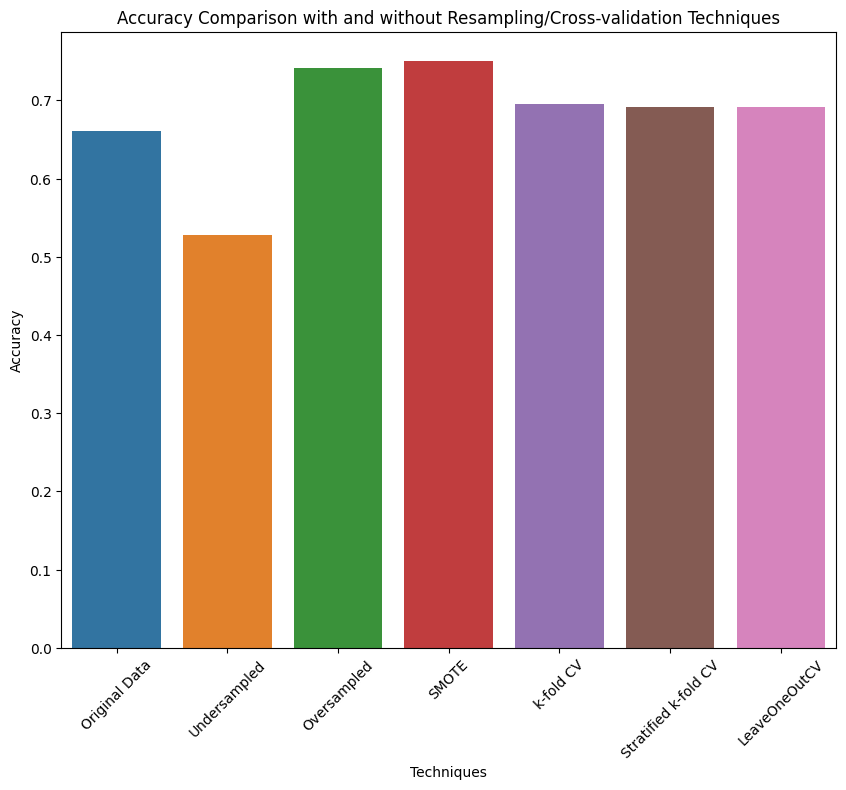

In [28]:
labels = ['Original Data', 'Undersampled', 'Oversampled', 'SMOTE', 'k-fold CV', 'Stratified k-fold CV', 'LeaveOneOutCV']
x = np.arange(len(labels))
accuracies = [accuracy] + resampled_accuracies + cross_val_accuracies

plt.figure(figsize=(10, 8))
sns.barplot(x=x, y=accuracies)
plt.xticks(x, labels, rotation=45)
plt.xlabel('Techniques')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison with and without Resampling/Cross-validation Techniques')
plt.show()
